Adversarial Patch Attack

In [1]:
#Importing required libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# Initialising model
model = MobileNetV2(weights='imagenet')

In [3]:
image_paths = ['hyena.JPEG', 'goldfish.JPEG', 'green_snake.JPEG', 'ostrich.JPEG', 'snail.JPEG']

In [4]:
#Initialising lists to store classification accuracies to be later used in plotting

original_classification_accuracy = [0]*5
k = 0

original_classes = [""]*5

1/1 [==============================] - 1s 650ms/step


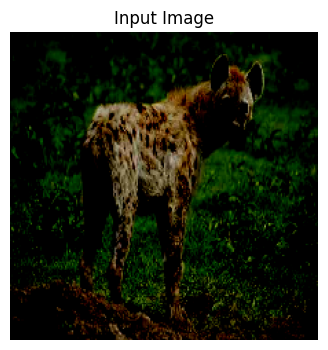

Top 5 Classification: 

1: hyena (0.91)
2: African_hunting_dog (0.03)
3: coyote (0.00)
4: llama (0.00)
5: Scottish_deerhound (0.00)


1/1 [==============================] - 0s 52ms/step


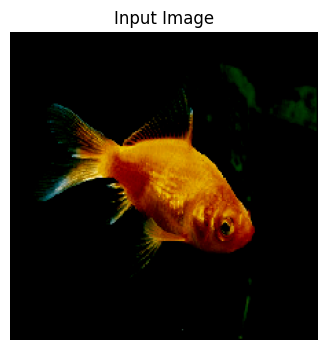

Top 5 Classification: 

1: goldfish (0.76)
2: puffer (0.05)
3: tench (0.04)
4: rock_beauty (0.01)
5: anemone_fish (0.00)


1/1 [==============================] - 0s 40ms/step


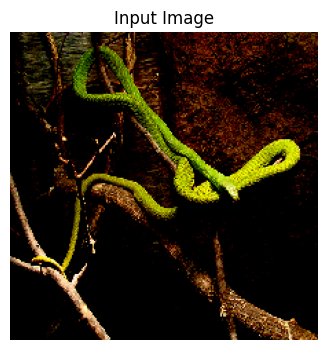

Top 5 Classification: 

1: green_mamba (0.88)
2: green_snake (0.07)
3: vine_snake (0.00)
4: green_lizard (0.00)
5: boa_constrictor (0.00)


1/1 [==============================] - 0s 41ms/step


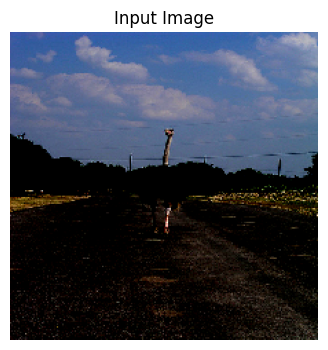

Top 5 Classification: 

1: ostrich (0.98)
2: black_swan (0.00)
3: peacock (0.00)
4: barrow (0.00)
5: gazelle (0.00)


1/1 [==============================] - 0s 73ms/step


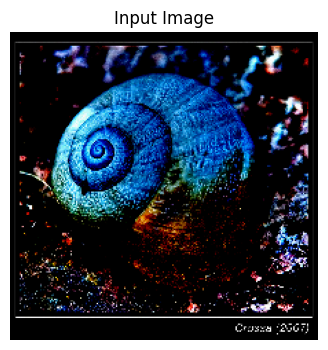

Top 5 Classification: 

1: snail (0.97)
2: conch (0.01)
3: chambered_nautilus (0.01)
4: hermit_crab (0.00)
5: chiton (0.00)




In [5]:
# First we'll see hoe good the model performs without any patch attack
for image_path in image_paths:
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  image = preprocess_input(image)

  predictions = model.predict(image)

  decoded_predictions = decode_predictions(predictions, top=5)[0]

  plt.figure(figsize=(4, 4))
  plt.imshow(image[0])
  plt.axis('off')
  plt.title("Input Image")
  plt.show()

  print("Top 5 Classification: \n")

  for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

  original_classification_accuracy[k] = decoded_predictions[0][2]
  original_classes[k] = decoded_predictions[0][1]
  k = k + 1

  print("\n")

In [6]:
# Load the pre-trained MobileNetV2 model with weights trained on ImageNet data
model = tf.keras.applications.MobileNetV2(weights='imagenet')

In [7]:
# Define the adversarial patch (replace with your patch image)
patch_path = 'patch1.jpg'
patch = plt.imread(patch_path)
patch = cv2.resize(patch, (150,150)) # (150,150) is the size (resized) of the patch

In [8]:
# List of input image file paths (replace with your list of image file paths)
input_image_paths = ['hyena.JPEG', 'goldfish.JPEG', 'green_snake.JPEG', 'ostrich.JPEG', 'snail.JPEG']

In [9]:
# (x, y) coordinates of the top-left corner of the patch on each target image
patch_position = (40, 40)

In [10]:
patched1_classification_accuracy = [0]*5
k = 0

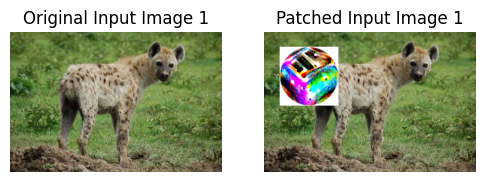

1/1 [==============================] - 1s 1s/step
Patched Input Image 1 Classification:
1: hyena (0.77)
2: African_hunting_dog (0.06)
3: coyote (0.01)
4: German_short-haired_pointer (0.01)
5: Scottish_deerhound (0.00)




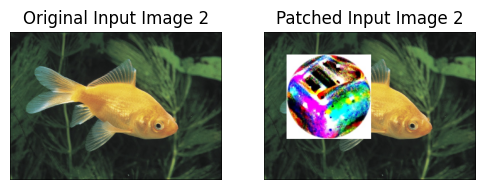

1/1 [==============================] - 0s 98ms/step
Patched Input Image 2 Classification:
1: goldfish (0.21)
2: piggy_bank (0.10)
3: ocarina (0.04)
4: pinwheel (0.02)
5: spindle (0.02)




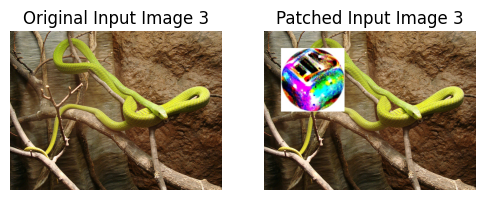

1/1 [==============================] - 0s 131ms/step
Patched Input Image 3 Classification:
1: green_mamba (0.28)
2: green_snake (0.20)
3: African_chameleon (0.04)
4: green_lizard (0.03)
5: vine_snake (0.02)




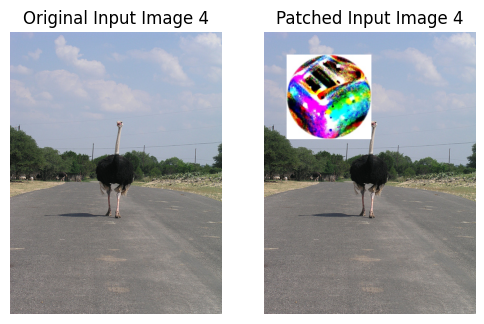

1/1 [==============================] - 0s 104ms/step
Patched Input Image 4 Classification:
1: balloon (0.21)
2: goblet (0.04)
3: parachute (0.03)
4: ostrich (0.03)
5: Boston_bull (0.03)




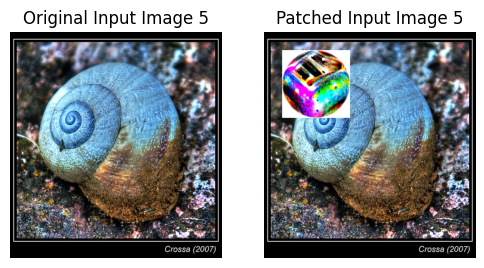

1/1 [==============================] - 0s 58ms/step
Patched Input Image 5 Classification:
1: snail (0.97)
2: conch (0.00)
3: chambered_nautilus (0.00)
4: chiton (0.00)
5: hermit_crab (0.00)




In [11]:
# Iterate through the input images
for i, input_image_path in enumerate(input_image_paths):
    # Load the input image
    input_image = plt.imread(input_image_path)

    # Display the original input image
    plt.figure(figsize=(6, 6))
    plt.subplot(121)
    plt.imshow(input_image)
    plt.title(f"Original Input Image {i + 1}")
    plt.axis('off')

    # Apply the patch to the input image
    x, y = patch_position
    patched_image = np.copy(input_image)
    patched_image[y:y+patch.shape[0], x:x+patch.shape[1], :] = patch

    # Display the patched image
    plt.subplot(122)
    plt.imshow(patched_image)
    plt.title(f"Patched Input Image {i + 1}")
    plt.axis('off')

    plt.show()

    # Preprocessing the patched image according to the model
    patched_image = cv2.resize(patched_image, (224, 224))
    patched_image = np.expand_dims(patched_image, axis=0)
    patched_image = tf.keras.applications.mobilenet_v2.preprocess_input(patched_image)

    # Make predictions on the patched image
    predictions_patched = model.predict(patched_image)

    # Decode predictions
    decoded_predictions_patched = tf.keras.applications.mobilenet_v2.decode_predictions(predictions_patched, top=5)[0]

    patched1_classification_accuracy[k] = decoded_predictions_patched[0][2]
    k = k + 1

    # Display the classification results for the patched image
    print(f"Patched Input Image {i + 1} Classification:")
    for j, (imagenet_id, label, score) in enumerate(decoded_predictions_patched):
        print(f"{j + 1}: {label} ({score:.2f})")
    print("\n")

In [12]:
# Repeating with a different patch position
patched2_classification_accuracy = [0]*5
k = 0

In [13]:
patch_position = (70, 70)

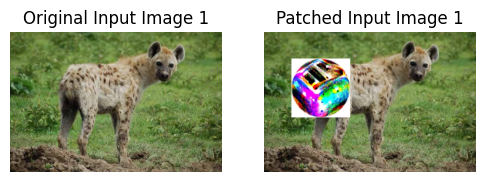

1/1 [==============================] - 0s 116ms/step
Patched Input Image 1 Classification:
1: hyena (0.74)
2: African_hunting_dog (0.07)
3: coyote (0.01)
4: piggy_bank (0.00)
5: dingo (0.00)




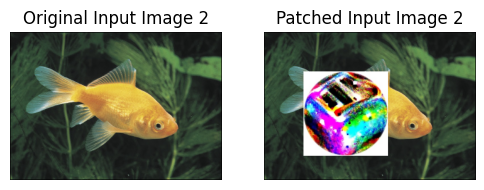

1/1 [==============================] - 0s 133ms/step
Patched Input Image 2 Classification:
1: piggy_bank (0.55)
2: ocarina (0.05)
3: toaster (0.05)
4: maraca (0.02)
5: purse (0.02)




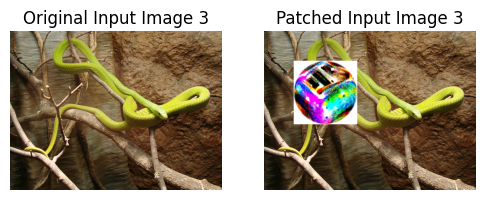

1/1 [==============================] - 0s 155ms/step
Patched Input Image 3 Classification:
1: green_mamba (0.14)
2: green_snake (0.13)
3: African_chameleon (0.07)
4: vine_snake (0.04)
5: green_lizard (0.03)




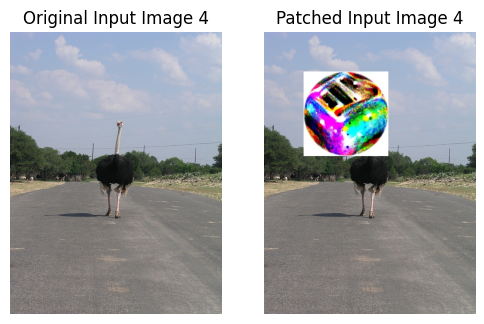

1/1 [==============================] - 0s 80ms/step
Patched Input Image 4 Classification:
1: piggy_bank (0.10)
2: balloon (0.08)
3: goblet (0.05)
4: confectionery (0.03)
5: peacock (0.02)




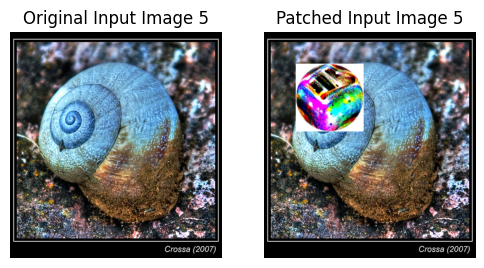

1/1 [==============================] - 0s 56ms/step
Patched Input Image 5 Classification:
1: snail (0.50)
2: clog (0.05)
3: piggy_bank (0.05)
4: pitcher (0.02)
5: buckeye (0.02)




In [14]:
# Iterate through the input images
for i, input_image_path in enumerate(input_image_paths):
    # Load the input image
    input_image = plt.imread(input_image_path)

    # Display the original input image
    plt.figure(figsize=(6, 6))
    plt.subplot(121)
    plt.imshow(input_image)
    plt.title(f"Original Input Image {i + 1}")
    plt.axis('off')

    # Apply the patch to the input image
    x, y = patch_position
    patched_image = np.copy(input_image)
    patched_image[y:y+patch.shape[0], x:x+patch.shape[1], :] = patch

    # Display the patched image
    plt.subplot(122)
    plt.imshow(patched_image)
    plt.title(f"Patched Input Image {i + 1}")
    plt.axis('off')

    plt.show()

    # Preprocess the patched image for model input
    patched_image = cv2.resize(patched_image, (224, 224))
    patched_image = np.expand_dims(patched_image, axis=0)
    patched_image = tf.keras.applications.mobilenet_v2.preprocess_input(patched_image)

    # Make predictions on the patched image
    predictions_patched = model.predict(patched_image)

    # Decode predictions
    decoded_predictions_patched = tf.keras.applications.mobilenet_v2.decode_predictions(predictions_patched, top=5)[0]

    patched2_classification_accuracy[k] = decoded_predictions_patched[0][2]
    k = k + 1

    # Display the classification results for the patched image
    print(f"Patched Input Image {i + 1} Classification:")
    for j, (imagenet_id, label, score) in enumerate(decoded_predictions_patched):
        print(f"{j + 1}: {label} ({score:.2f})")
    print("\n")

In [15]:
print(original_classes)
print(original_classification_accuracy)
print(patched1_classification_accuracy)
print(patched2_classification_accuracy)

['hyena', 'goldfish', 'green_mamba', 'ostrich', 'snail']
[0.90719616, 0.757459, 0.8766548, 0.9841106, 0.97316957]
[0.7735199, 0.20568162, 0.28002936, 0.20553486, 0.97315943]
[0.7370604, 0.54805416, 0.14133087, 0.101325475, 0.50217164]


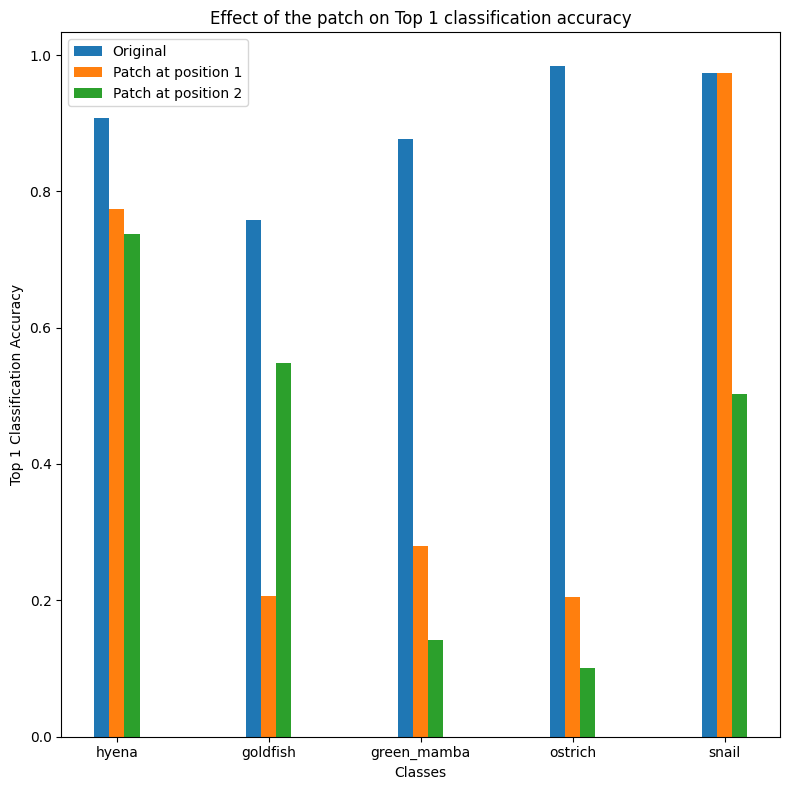

In [16]:
# Sample data
classes = original_classes
values1 = original_classification_accuracy
values2 = patched1_classification_accuracy
values3 = patched2_classification_accuracy

x = range(len(classes))

# Plotting the grouped bar chart
plt.figure(figsize=(8, 8))  # Set the figure size
width = 0.1  # Width of each bar

plt.bar(x, values1, width=width, label='Original', align='center')
plt.bar([i + width for i in x], values2, width=width, label='Patch at position 1', align='center')
plt.bar([i + 2 * width for i in x], values3, width=width, label='Patch at position 2', align='center')

plt.xlabel('Classes')
plt.ylabel('Top 1 Classification Accuracy')
plt.xticks([i + width for i in x], classes)
plt.legend()
plt.title('Effect of the patch on Top 1 classification accuracy')
plt.tight_layout()
plt.show()

As we can observe, all input images Top 1 Classification was greatly affected by the Patch attack. The original performance of the model is typically 96-99% which was on an average, which typically goes down to less than half of the original. Changin the patch positions and sie also has some effect on the degree of misclassification. You are free to use other patches to test the program.